### **California Housing Price**

[Sumber data California Housing Price](https://drive.google.com/drive/folders/19YA_f36uGR86hTnZuX-Ech59s3AFzXXo) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Dataset ini berisi tentang informasi rumah-rumah dari distrik-distrik di California berdasarkan data tahun 1990. Meskipun data ini sudah lama, dataset ini masih dapat digunakan karena memberikan wawasan tentang pola-pola dasar yang memengaruhi harga rumah. Dataset ini terdiri dari beberapa fitur seperti lokasi geografis, jumlah kamar, jumlah rumah tangga, populasi, usia rata-rata rumah, pendapatan rata-rata, serta nilai rata-rata rumah. Selain itu, terdapat informasi tentang kedekatan geografis rumah dengan laut, yang dapat memengaruhi nilai properti di wilayah tersebut

**Problem Statement**

dikutip dari [AntaraNews](https://www.antaranews.com/berita/4160796/harga-rumah-di-california-catat-rekor-tertinggi-pada-mei-2024).
Harga rumah median di seluruh California, negara bagian dengan jumlah penduduk terbesar di Amerika Serikat (AS), mencatatkan rekor tertinggi baru pada Mei 2024. Karena kelangkaan rumah yang dijual, terutama pada segmen pasar dengan Harga yang lebih terjangkau, terus mendorong Harga median rumah di California ke rekor tertinggi baru. 

Dengan meningkatnya Harga median rumah di California, penting untuk memahami faktor-faktor apa saja yang mempengaruhi Harga rumah untuk membantu berbagai pihak seperti agen properti dan pengembang perumahan untuk mengambil keputusan dalam menentukan harga rumah.

**Goals**

Berdasarkan permasalahan yang ada, Meskipun dataset yang kita miliki tidak bisa untuk memprediksi harga rumah saat ini, tapi kita bisa memahami tentang faktor-faktor yang memengaruhi harga rumah karena sangat penting bagi berbagai pihak. Fitur seperti usia rumah, populasi, pendapatan rata-rata, dan lokasi geografis (misalnya kedekatan dengan laut) dapat memberikan wawasan penting tentang nilai properti atau harga rumah.

**Analytic Approach**

Jadi yang diperlukan adalah menganalisis data untuk menemukan pola atau hubungan antara fitur yang tersedia dalam mempengaruhi Harga rumah.

perlu juga untuk membangun model prediksi menggunakan algoritma regresi untuk memprediksi nilai median rumah berdasarkan fitur-fitur yang tersedia. Model prediksi ini akan sangat berguna untuk membantu berbagai pihak, seperti  agen properti dan pengembang perumahan, dalam membuat keputusan berdasarkan wawasan data. 

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE.
1. RMSE (Root Mean Square Error): Nilai ini menunjukkan akar rata-rata kuadrat dari error. RMSE mengukur tingkat kesalahan prediksi dengan memberikan bobot yang lebih besar pada error yang lebih besar. Semakin kecil RMSE, semakin baik performa model.
2. MAE (Mean Absolute Error): Nilai rata-rata absolut dari error yang menunjukkan seberapa jauh prediksi model dari nilai sebenarnya. MAE memberikan gambaran tentang kesalahan rata-rata tanpa memperhatikan arah error.
3. MAPE (Mean Absolute Percentage Error): Rata-rata persentase error relatif terhadap nilai sebenarnya. MAPE cocok digunakan untuk mengukur akurasi model dalam konteks harga rumah, karena error dinyatakan dalam bentuk persentase, yang lebih mudah dimengerti.

Selain itu, jika model yang digunakan adalah model linear, kita juga dapat menggunakan R-squared. R-squared digunakan untuk menilai seberapa baik fitur-fitur seperti lokasi geografis atau pendapatan rata-rata menjelaskan variasi harga rumah di berbagai distrik. Semakin mendekati 1, semakin baik model memprediksi data. namun R-Squared tidak valid untuk model non linear. Maka dari itu kita juga akan menggunakan Random Forest atau algoritma lain jika model yang digunakan adalah model non linear.

### **Data Understanding**

- Dataset merupakan data California Housing Price pada tahun 1990.
- Setiap baris data merepresentasikan informasi terkait rumah yang ada di California.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | Koordinat geografis rumah berdasarkan bujur |
| latitude | Float | Koordinat geografis rumah berdasarkan lintang |
| housing_median_age | Float | Usia rata-rata rumah |
| total_rooms | Float | Total jumlah ruangan |
| total_bedrooms | Float | Total jumlah kamar tidur |
| population | Float | Jumlah total penduduk |
| households | Float | Jumlah total rumah tangga |
| median_income | Float | Pendapatan rata-rata per rumah tangga |
| ocean_proximity | Object | Kedekatan geografis rumah dengan laut |
| median_house_value | Float | Nilai rata-rata rumah |

<br>

In [476]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [477]:
# Load dataset
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [478]:
# Melihat tipe data
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
median_house_value    float64
dtype: object

#### **Exploratory Data Analysis**

**Distribusi median_house_value California**

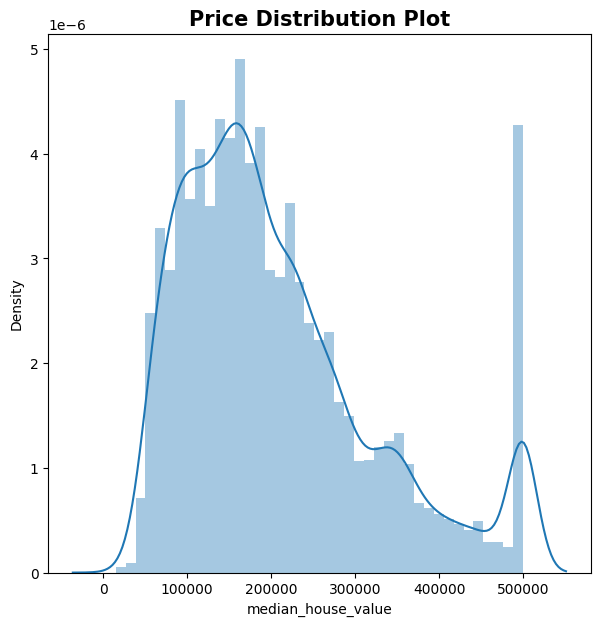

In [479]:
# Plot distribusi fitur 'median_house_value'
plt.figure(figsize=(7, 7))
sns.distplot(df['median_house_value'])
plt.title('Price Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi median_house_value California, dapat disimpulkan bahwa distribusi harga rumah menunjukkan skewness positif atau right-skewed distribution. Ini berarti bahwa sebagian besar harga rumah berada pada rentang yang lebih rendah (sekitar 100.000 hingga 300.000), sementara sebagian kecil berada pada rentang yang jauh lebih tinggi.

**Housing Median Age berhubungan dengan Median House Value**

In [480]:
# Cek jumlah rumah berdasarkan Housing Median Age
df.groupby(['housing_median_age'])['median_house_value'].count()

housing_median_age
1.0       2
2.0      37
3.0      45
4.0     139
5.0     184
6.0     117
7.0     117
8.0     145
9.0     144
10.0    186
11.0    182
12.0    153
13.0    217
14.0    293
15.0    342
16.0    523
17.0    502
18.0    402
19.0    359
20.0    321
21.0    313
22.0    276
23.0    305
24.0    339
25.0    395
26.0    428
27.0    338
28.0    352
29.0    324
30.0    338
31.0    314
32.0    397
33.0    432
34.0    496
35.0    573
36.0    585
37.0    375
38.0    277
39.0    247
40.0    211
41.0    221
42.0    270
43.0    244
44.0    256
45.0    189
46.0    176
47.0    132
48.0    111
49.0     93
50.0     99
51.0     36
52.0    896
Name: median_house_value, dtype: int64

In [481]:
# Cek median price untuk tiap Housing median age
df_median_price_age = df.groupby(by=['housing_median_age']).agg({'median_house_value':'median'}).reset_index()
df_median_price_age = df_median_price_age.set_index('housing_median_age')
df_median_price_age = df_median_price_age.sort_values('median_house_value', ascending =False)
df_median_price_age.head(15)

,median_house_value
housing_median_age,
52.0,259500.0
49.0,225000.0
51.0,220550.0
3.0,217500.0
4.0,215000.0
25.0,208000.0
26.0,193300.0
24.0,191900.0
36.0,190400.0


Jika dilihat dari data yang ada, Housing median age (usia rata-rata rumah) tidak begitu berpengaruh pada Median House Value. Karena usia rumah dari Median House Value paling tinggi cukup beragam mulai dari rumah yang berusia paling tua maupun yang paling baru.

**Total Rooms dan total bedrooms berhubungan dengan median price**

In [482]:
# Cek jumlah ruangan dan kamar tidur berdasarkan Housing Median Age
df.groupby(['total_rooms','total_bedrooms'])['median_house_value'].count()

total_rooms  total_bedrooms
2.0          2.0               1
6.0          2.0               1
8.0          1.0               1
11.0         11.0              1
12.0         4.0               1
                              ..
30401.0      4957.0            1
30405.0      4093.0            1
30450.0      5033.0            1
32054.0      5290.0            1
32627.0      6445.0            1
Name: median_house_value, Length: 14217, dtype: int64

In [483]:
# Cek median price untuk tiap total_rooms
df_median_price_rooms = df.groupby(by=['total_rooms','total_bedrooms']).agg({'median_house_value':'median'}).reset_index()
df_median_price_rooms = df_median_price_rooms.set_index('total_rooms')
df_median_price_rooms = df_median_price_rooms.sort_values('median_house_value', ascending =False)
df_median_price_rooms

,total_bedrooms,median_house_value
total_rooms,,
8.0,1.0,500001.0
17591.0,2604.0,500001.0
1421.0,163.0,500001.0
2260.0,261.0,500001.0
1428.0,320.0,500001.0
...,...,...
9975.0,1743.0,22500.0
107.0,79.0,22500.0
98.0,28.0,14999.0


Jika dilihat dari data yang ada, total ruangan dan total kamar tidur tidak begitu berpengaruh pada Median House Value. Karena total ruangan dan total kamar tidur dari Median House Value paling tinggi cukup beragam mulai dari rumah yang memiliki ruangan dan kamar paling banyak maupun sedikit.

**median income berhubungan dengan median price**

In [484]:
# melakukan binning untuk mengelompokan nilai numerik menjadi kategori

label = ['Low', 'Middle', 'High']
bin_income = [0,5.0000,10.0000,15.0001]
df['income_rate'] = pd.cut(df['median_income'], bins=bin_income, labels=label)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,income_rate
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,Low
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,Low
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,Middle
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,Low
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,Low
...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,Low
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,Low
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0,Low
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,Middle


In [485]:
# Cek jumlah rumah berdasarkan median income
df.groupby(['income_rate'])['median_house_value'].count().sort_values(ascending=False)

income_rate
Low       11326
Middle     2909
High        213
Name: median_house_value, dtype: int64

In [486]:
# Cek median price untuk tiap median income
df_median_price_income = df.groupby(by=['income_rate']).agg({'median_house_value':'median'}).reset_index()
df_median_price_income = df_median_price_income.set_index('income_rate')
df_median_price_income = df_median_price_income.sort_values('median_house_value', ascending =False)
df_median_price_income

,median_house_value
income_rate,
High,500001.0
Middle,299600.0
Low,157300.0


Bisa dilihat dari data yang ada, Median_income berpengaruh pada median house value. Karena jika dilihat, Median Income yang tinggi memiliki Median House Value paling tinggi. sedangkan untuk Median Income yang rendah juga memiliki median house value yang rendah.

**ocean proximity berhubungan dengan median price**

In [487]:
# Cek jumlah rumah berdasarkan ocean_proximity
df.groupby(['ocean_proximity'])['median_house_value'].count()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
ISLAND           2
NEAR BAY      1622
NEAR OCEAN    1879
Name: median_house_value, dtype: int64

Kebanyakan rumah berada cukup jauh dari laut.

In [488]:
# Cek median price untuk tiap ocean proximity
df_median_price_proximity = df.groupby(by=['ocean_proximity']).agg({'median_house_value':'median'}).reset_index()
df_median_price_proximity = df_median_price_proximity.set_index('ocean_proximity')
df_median_price_proximity = df_median_price_proximity.sort_values('median_house_value', ascending =False)
df_median_price_proximity.head()

,median_house_value
ocean_proximity,
ISLAND,351100.0
NEAR BAY,230800.0
NEAR OCEAN,228600.0
<1H OCEAN,214800.0
INLAND,108800.0


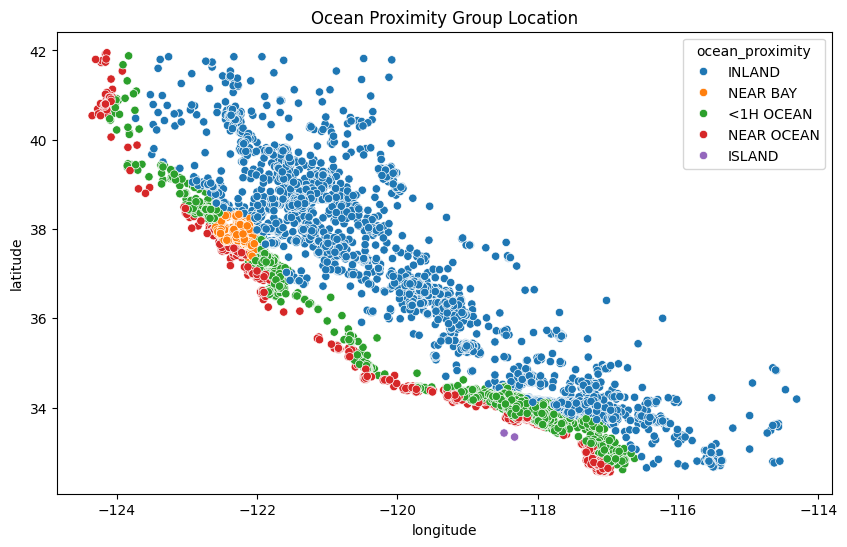

In [489]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['ocean_proximity']).set_title('Ocean Proximity Group Location')
plt.show()


Bisa dilihat dari data yang ada, semakin dekat ke laut maka semakin tinggi juga median house value nya. Bahkan meskipun jumlah rumah yang ada cukup jauh dari laut lebih banyak dibandingkan dengan rumah yang berada dekat dari laut, tetapi harga median housenya tetap lebih besar rumah yang berada dekat dari laut. Hal tersebut menunjukkan bahwa Ocean Proximity berpengaruh pada Nilai rata-rata rumah.

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [490]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [491]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-122.82, -118.54]"
1,latitude,float64,0,0.00,836,"[37.37, 32.66]"
2,housing_median_age,float64,0,0.00,52,"[10.0, 49.0]"
3,total_rooms,float64,0,0.00,5227,"[6141.0, 2323.0]"
4,total_bedrooms,float64,137,0.95,1748,"[654.0, 1819.0]"
5,population,float64,0,0.00,3498,"[499.0, 4528.0]"
6,households,float64,0,0.00,1649,"[645.0, 1409.0]"
7,median_income,float64,0,0.00,9797,"[1.4384, 6.3568]"
8,ocean_proximity,object,0,0.00,5,"[NEAR OCEAN, NEAR BAY]"
9,median_house_value,float64,0,0.00,3548,"[148500.0, 446400.0]"


Dari info dataset diatas, dapat kita lihat bahwa total_bedrooms memiliki missing value. kita perlu memeriksa data tersebut agar bisa diketahui langkah apa yang perlu diambil untuk missing value pada kolom total_bedrooms.

**Missing Value**

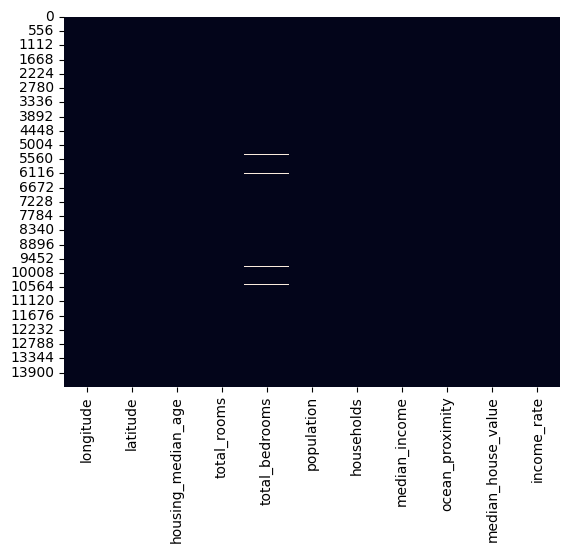

In [492]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

Dilihat dari persebaran missing value pada total_bedrooms serta persentase missing value yang dimiliki berada dibawah 1%, dengan mempertimbangkan kedua faktor tersebut maka diputuskan bahwa baris yang memiliki missing value akan di hapus. 

In [493]:
df_model.dropna(subset=['total_bedrooms'],inplace=True)

In [494]:
df_model.isnull().sum()/df_model.shape[0]*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
ocean_proximity       0.0
median_house_value    0.0
income_rate           0.0
dtype: float64

Setelah missing value sudah diatasi, kita bisa mengecek apakah ada data yang duplikat.

**Duplicate data**

In [495]:
# Cek data duplikat
df_model.duplicated().sum()

np.int64(0)

Karena tidak ada data yang duplikat, maka kita bisa melanjutkan untuk mengecek data anomali yang lain.

In [496]:
display(df_model.describe(), df_model.describe(include='object'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,14311
unique,5
top,<1H OCEAN
freq,6300


Pengecualian untuk fitur 'longitude', tidak ada fitur yang memiliki nilai negatif (< 0). Selain itu tidak ada juga data yang memiliki nilai sama dengan 0.

**label encoding**

karena untuk ocean_proximity merupakan jarak kedekatan dengan laut, jika menggunakan One Hot Encoding  ditakutkan tidak sesuai dengan urutan jarak kedekatan laut, maka dari itu disini saya menggunakan manual label encoding.

In [497]:
df_model['proximity_encode'] = df_model['ocean_proximity'].map({'ISLAND' : 1, 'NEAR OCEAN' : 2, '<1H OCEAN' : 3, 'NEAR BAY' : 4, 'INLAND' : 5})

**Data Correlation**

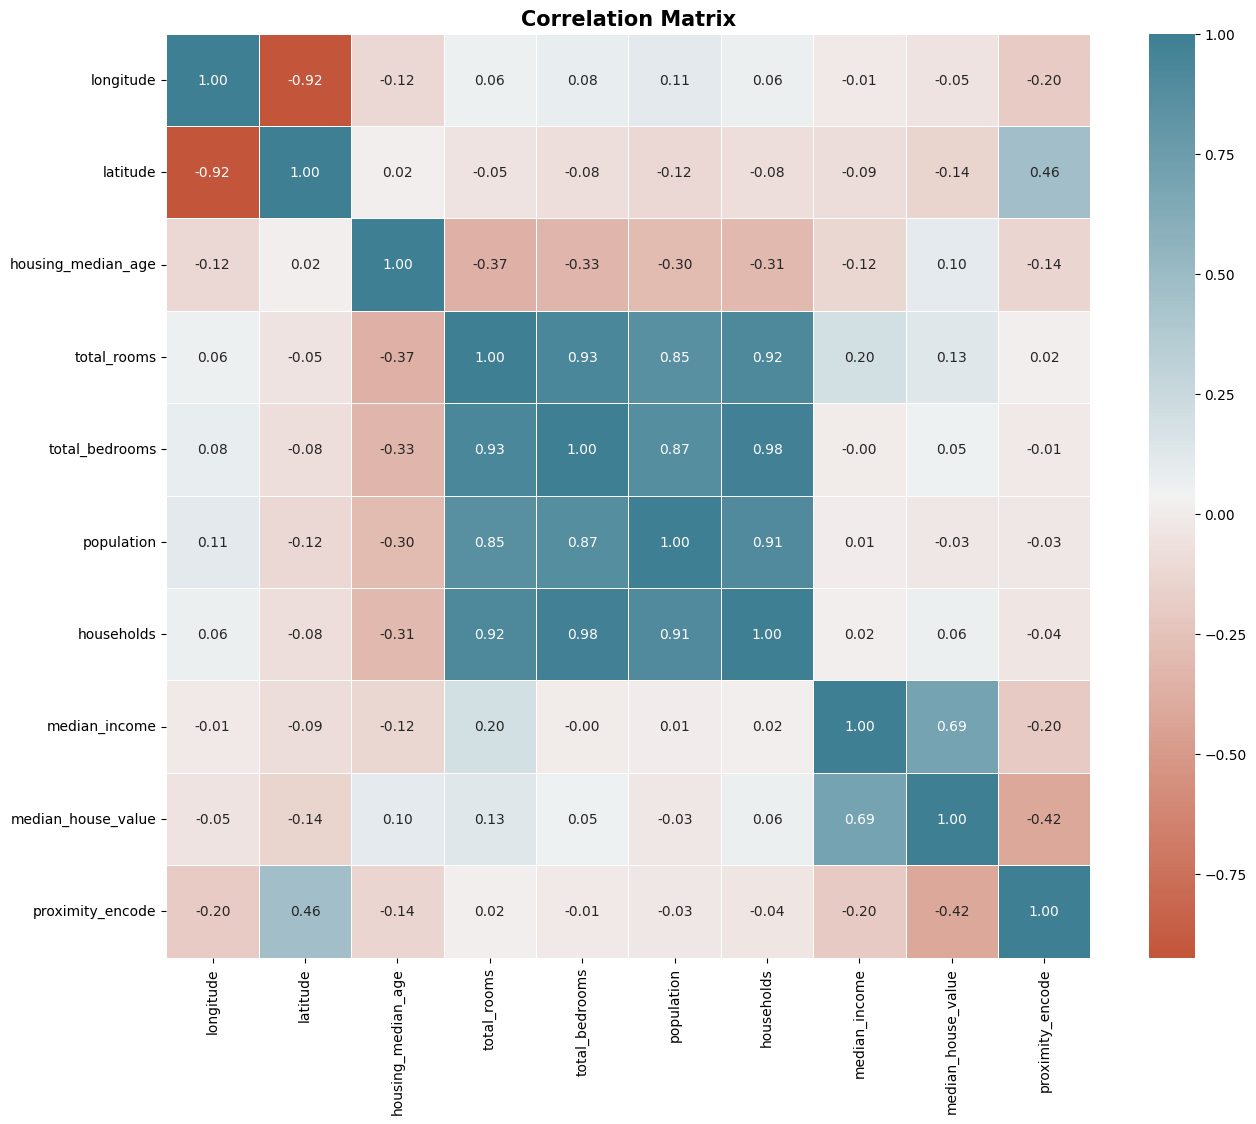

In [498]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson',numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation matrix diatas menunjukkan bahwa median house value hanya memiliki 2 fitur yang berkolerasi sedang yaitu dengan median income dan proximity_encode. Sedangkan untuk fitur lain korelasinya sangat lemah.
- Korelasi Median house value dengan median income adalah sebanyak 0.69 yang menunjukkan bahwa keduanya memiliki hubungan positif yang cukup kuat. Yang artinya semakin besar/meningkatnya median income maka median house value juga semakin besar/meningkat. begitu pula sebaliknya.
- Korelasi Median house value dengan proximity_encode adalah sebanyak -0.42 yang meunjukkan bahwa keduanya memilki hubungan negatif sedang. Yang artinya semakin besar proximity_encode (semakin jauh dari laut) maka median house value cenderung semakin kecil. begitu pula sebaliknya.

**Outliers Detection**

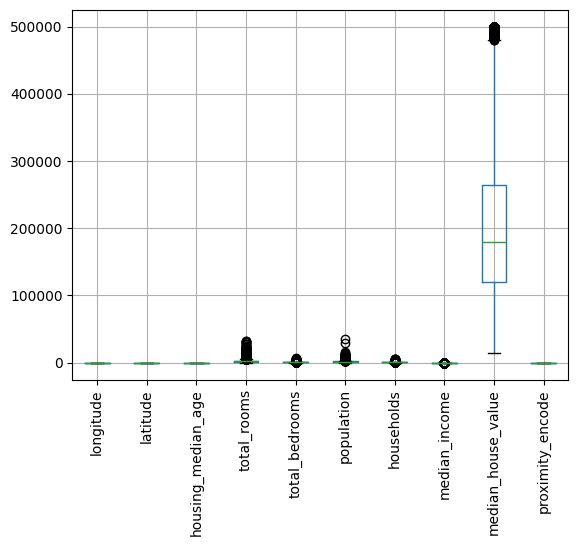

In [499]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

terdapat cukup banyak fitur yang memiliki outliers sehingga perlu ditangani untuk membuat dataset yang lebih bersih.

In [500]:
# Membuat fungsi untuk mengecek outliers
def CheckOutliers(df_clean, col):
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[col] < lower_fence) | (df_clean[col] > upper_fence)]
    
    results_df = pd.DataFrame({
        "Q1": [Q1],
        "Q3": [Q3],
        "IQR": [IQR],
        "Lower Fence": [lower_fence],
        "Upper Fence": [upper_fence],
        "Outliers Sum" : [len(outliers)],
        "Outliers Percentage": [round((len(outliers) / len(df_clean)) * 100, 2)]
    })
    
    return results_df

In [501]:
def calculate_all_numeric_outliers(df_model):
    # Filter untuk kolom numerik
    numeric_cols = df_model.select_dtypes(include='number').columns
    # Membuat DataFrame kosong untuk menyimpan hasil
    all_results = pd.DataFrame()
    
    # Melakukan perulangan pada setiap kolom numerik dan menghitung statistik outlier
    for col in numeric_cols:
        result_df = CheckOutliers(df_model, col)
        result_df.insert(0, 'Column', col)
        all_results = pd.concat([all_results, result_df], ignore_index=True)
    
    return all_results

calculate_all_numeric_outliers(df_model)

,Column,Q1,Q3,IQR,Lower Fence,Upper Fence,Outliers Sum,Outliers Percentage
0,longitude,-121.8000,-118.0000,3.8000,-127.50000,-112.30000,0,0.00
1,latitude,33.9300,37.7150,3.7850,28.25250,43.39250,0,0.00
2,housing_median_age,18.0000,37.0000,19.0000,-10.50000,65.50000,0,0.00
3,total_rooms,1452.0000,3142.0000,1690.0000,-1083.00000,5677.00000,905,6.32
4,total_bedrooms,295.0000,647.0000,352.0000,-233.00000,1175.00000,879,6.14
5,population,784.0000,1722.0000,938.0000,-623.00000,3129.00000,822,5.74
6,households,279.0000,603.5000,324.5000,-207.75000,1090.25000,836,5.84
7,median_income,2.5694,4.7361,2.1667,-0.68065,7.98615,477,3.33
8,median_house_value,119400.0000,263750.0000,144350.0000,-97125.00000,480275.00000,751,5.25
9,proximity_encode,3.0000,5.0000,2.0000,0.00000,8.00000,0,0.00


Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal.

**total rooms**

In [502]:
# Cek deskriptif statistik kolom total rooms
df_model['total_rooms'].describe()

count    14311.000000
mean      2640.917686
std       2197.192896
min          2.000000
25%       1452.000000
50%       2125.000000
75%       3142.000000
max      32627.000000
Name: total_rooms, dtype: float64

In [503]:
# Cek total rooms > 5677.00000
df_model[df_model['total_rooms'] > 5677.00000].count()['total_rooms']

np.int64(905)

Terdapat 905 data yang nilai total rooms-nya lebih besar dari 5677.00000 (batas atas metode IQR). Karena itu, data yang memiliki total rooms lebih besar dari 5677.00000 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang akan dibangun. 

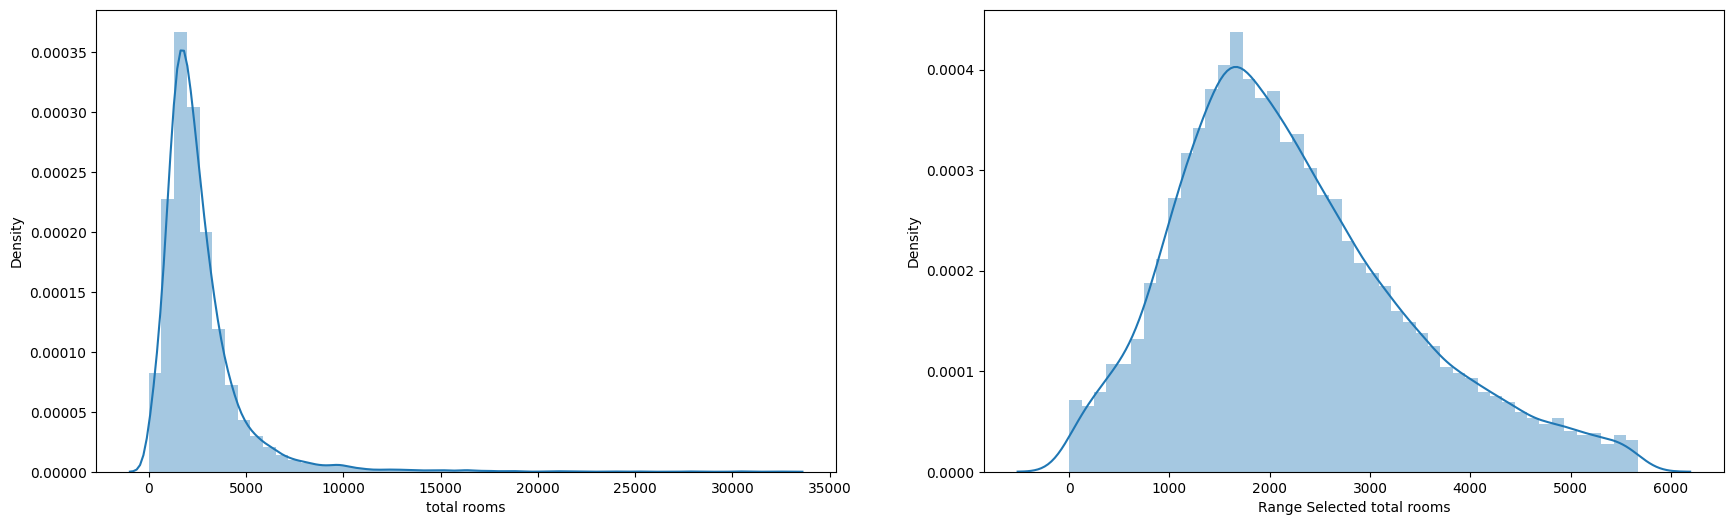

In [504]:
# Melakukan filtering pada data
df_model = df_model[(df_model['total_rooms'] <= 5677.00000)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['total_rooms'], ax=axes[0])
sns.distplot(df_model['total_rooms'], ax=axes[1])
axes[0].set_xlabel('total rooms')
axes[1].set_xlabel('Range Selected total rooms');

In [505]:
# Cek deskriptif statistik kolom 'total_rooms' setelah filtering
df_model['total_rooms'].describe()

count    13406.000000
mean      2220.195360
std       1150.196311
min          2.000000
25%       1407.250000
50%       2029.000000
75%       2881.000000
max       5677.000000
Name: total_rooms, dtype: float64

**total bedrooms**

In [506]:
# Cek deskriptif statistik kolom total bedrooms
df_model['total_bedrooms'].describe()

count    13406.000000
mean       462.087498
std        252.641039
min          1.000000
25%        287.000000
50%        416.000000
75%        595.000000
max       2610.000000
Name: total_bedrooms, dtype: float64

In [507]:
# Cek total bedrooms > 1175.00000
df_model[df_model['total_bedrooms'] > 1175.00000].count()['total_bedrooms']

np.int64(198)

Terdapat 198 data yang nilai total bedrooms-nya lebih besar dari 1175.00000 (batas atas metode IQR). Karena itu, data yang memiliki total bedrooms lebih besar dari 1175.00000 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang akan dibangun. 

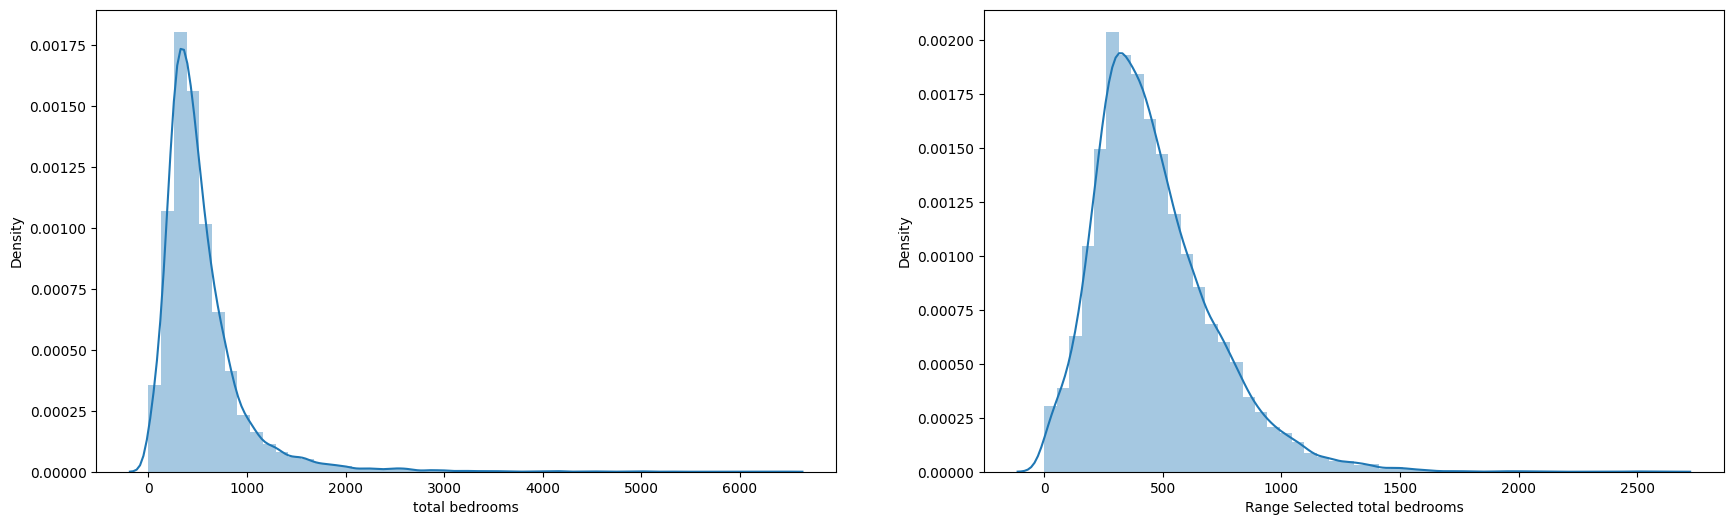

In [508]:
# Melakukan filtering pada data
df_model = df_model[(df_model['total_bedrooms'] <= 5677.00000)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['total_bedrooms'], ax=axes[0])
sns.distplot(df_model['total_bedrooms'], ax=axes[1])
axes[0].set_xlabel('total bedrooms')
axes[1].set_xlabel('Range Selected total bedrooms');

In [509]:
# Cek deskriptif statistik kolom 'total_bedrooms' setelah filtering
df_model['total_bedrooms'].describe()

count    13406.000000
mean       462.087498
std        252.641039
min          1.000000
25%        287.000000
50%        416.000000
75%        595.000000
max       2610.000000
Name: total_bedrooms, dtype: float64

**population**

In [510]:
# Cek deskriptif statistik kolom population
df_model['population'].describe()

count    13406.000000
mean      1238.635984
std        705.497409
min          3.000000
25%        764.000000
50%       1113.500000
75%       1585.750000
max       8733.000000
Name: population, dtype: float64

In [511]:
# Cek population > 3129.00000
df_model[df_model['population'] > 3129.00000].count()['population']

np.int64(238)

Terdapat 238 data yang nilai population-nya lebih besar dari 3129.00000 (batas atas metode IQR). Karena itu, data yang memiliki population lebih besar dari 3129.00000 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang akan dibangun. 

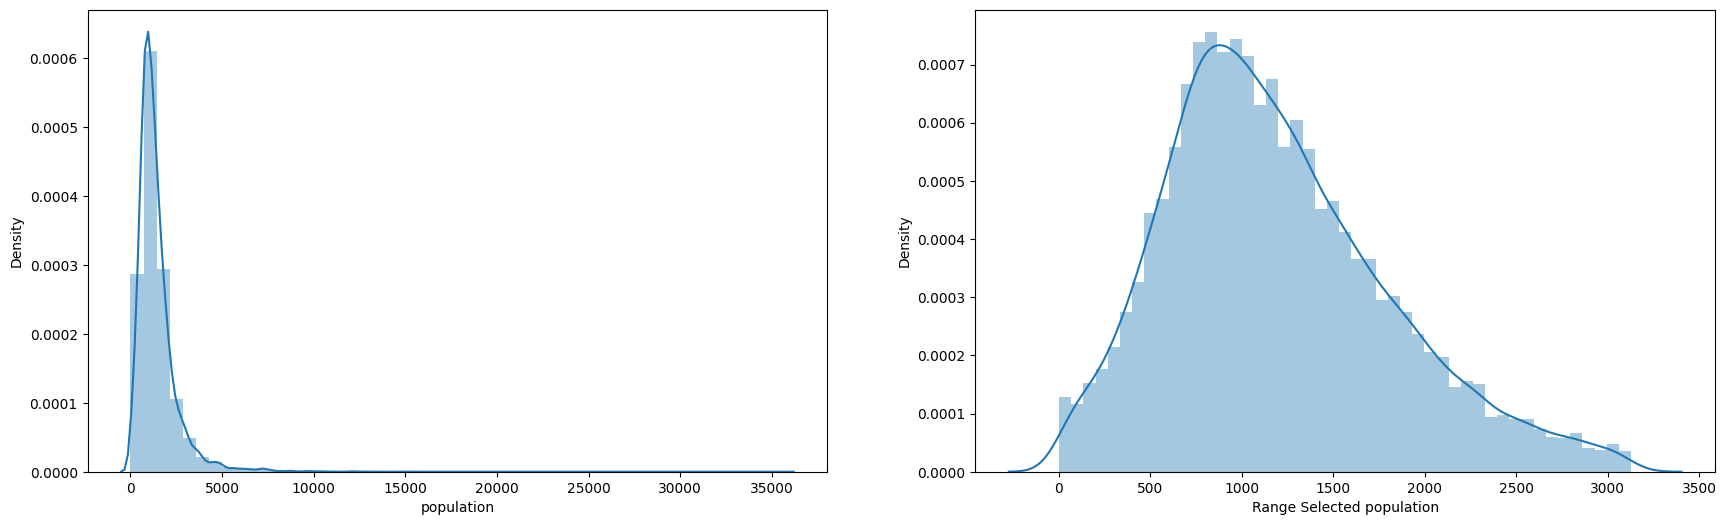

In [512]:
# Melakukan filtering pada data
df_model = df_model[(df_model['population'] <= 3129.00000)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['population'], ax=axes[0])
sns.distplot(df_model['population'], ax=axes[1])
axes[0].set_xlabel('population')
axes[1].set_xlabel('Range Selected population');

In [513]:
# Cek deskriptif statistik kolom 'population' setelah filtering
df_model['population'].describe()

count    13168.000000
mean      1191.934614
std        609.708802
min          3.000000
25%        758.000000
50%       1098.000000
75%       1551.000000
max       3127.000000
Name: population, dtype: float64

**households**

In [514]:
# Cek deskriptif statistik kolom households
df_model['households'].describe()

count    13168.000000
mean       422.023922
std        218.745141
min          1.000000
25%        269.000000
50%        388.000000
75%        544.000000
max       1755.000000
Name: households, dtype: float64

In [515]:
# Cek households > 1090.25000
df_model[df_model['households'] > 1090.25000].count()['households']

np.int64(110)

Terdapat 110 data yang nilai households-nya lebih besar dari 1090.25000 (batas atas metode IQR). Karena itu, data yang memiliki households lebih besar dari 1090.25000 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang akan dibangun. 

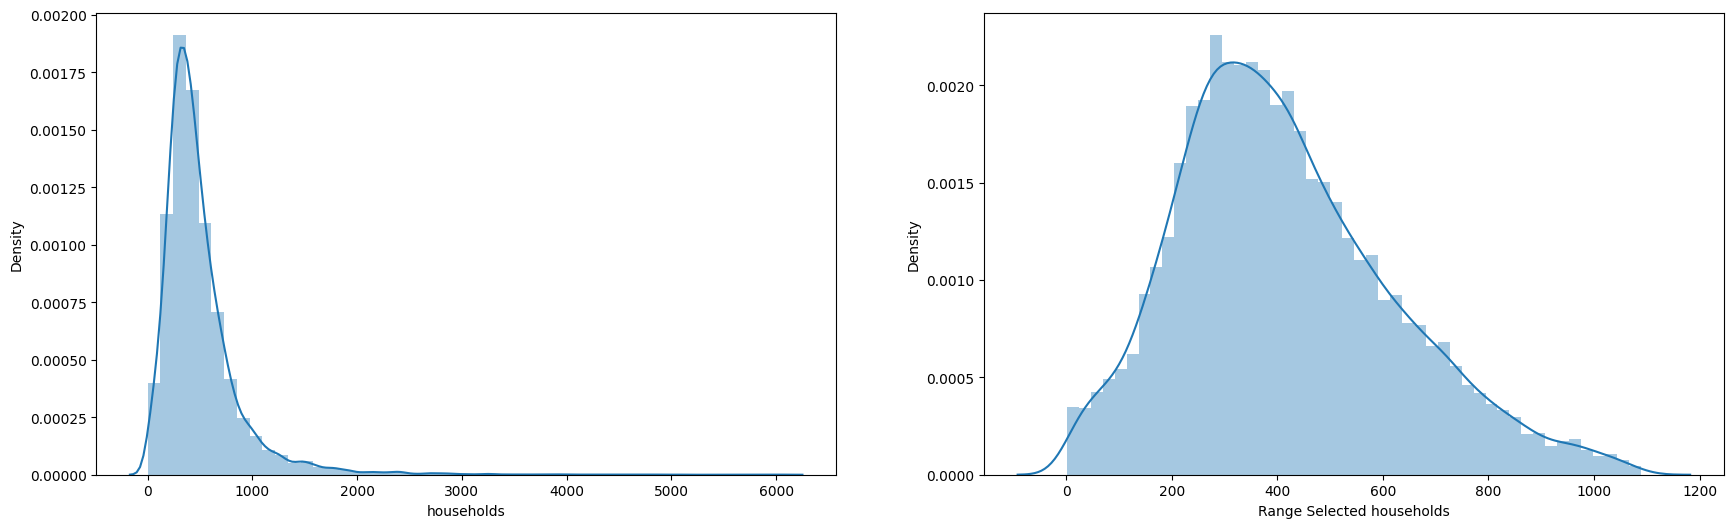

In [516]:
# Melakukan filtering pada data
df_model = df_model[(df_model['households'] <= 1090.25000)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['households'], ax=axes[0])
sns.distplot(df_model['households'], ax=axes[1])
axes[0].set_xlabel('households')
axes[1].set_xlabel('Range Selected households');

In [517]:
# Cek deskriptif statistik kolom 'households' setelah filtering
df_model['households'].describe()

count    13058.000000
mean       415.231123
std        206.396305
min          1.000000
25%        269.000000
50%        386.000000
75%        540.000000
max       1089.000000
Name: households, dtype: float64

**median income**

In [518]:
# Cek deskriptif statistik kolom median income
df_model['median_income'].describe()

count    13058.000000
mean         3.831520
std          1.885450
min          0.499900
25%          2.545850
50%          3.512900
75%          4.696225
max         15.000100
Name: median_income, dtype: float64

In [519]:
# Cek median income > 7.98615
df_model[df_model['median_income'] > 7.98615].count()['median_income']

np.int64(415)

Terdapat 415 data yang nilai median income-nya lebih besar dari 7.98615 (batas atas metode IQR). Karena itu, data yang memiliki median income lebih besar dari 7.98615 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang akan dibangun. 

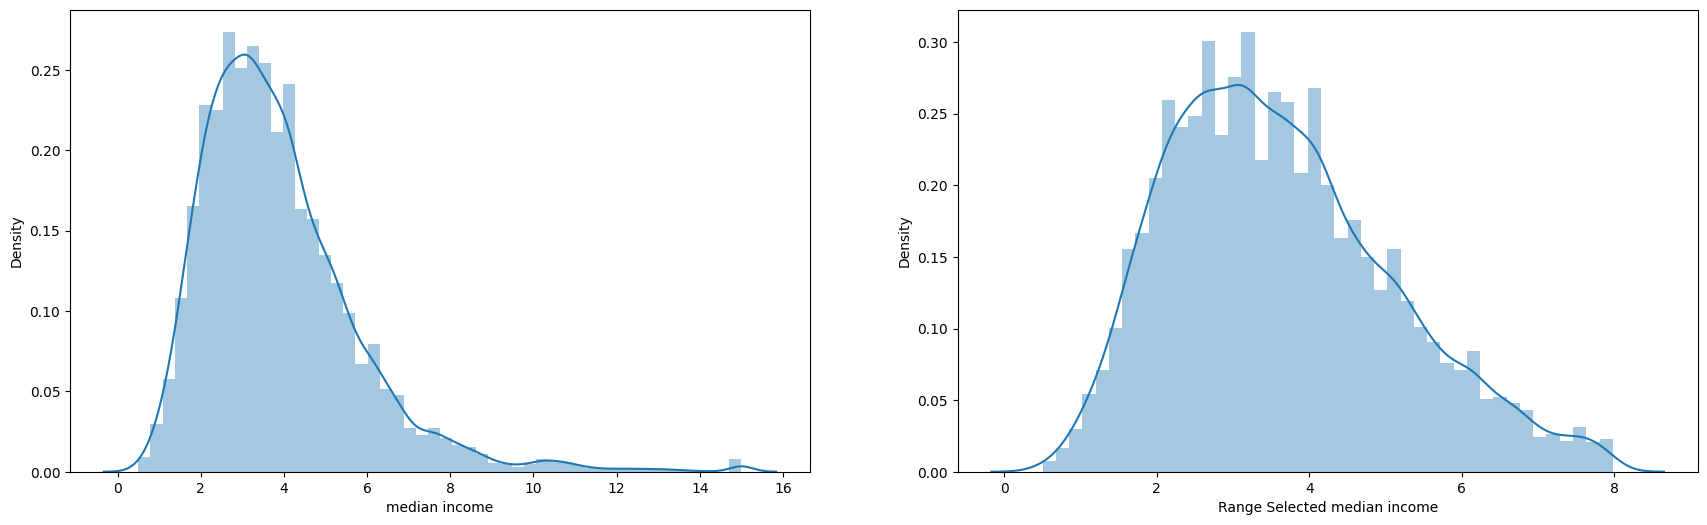

In [520]:
# Melakukan filtering pada data
df_model = df_model[(df_model['median_income'] <= 7.98615)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_income'], ax=axes[0])
sns.distplot(df_model['median_income'], ax=axes[1])
axes[0].set_xlabel('median income')
axes[1].set_xlabel('Range Selected median income');

In [521]:
# Cek deskriptif statistik kolom 'median_income' setelah filtering
df_model['median_income'].describe()

count    12643.000000
mean         3.624396
std          1.478674
min          0.499900
25%          2.515300
50%          3.442700
75%          4.550000
max          7.983500
Name: median_income, dtype: float64

**median house value**

In [522]:
# Cek deskriptif statistik kolom median house value
df_model['median_house_value'].describe()

count     12643.000000
mean     196417.038915
std      106686.054295
min       14999.000000
25%      114800.000000
50%      174100.000000
75%      250250.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [523]:
# Cek median house value > 480275.00000
df_model[df_model['median_house_value'] > 480275.00000].count()['median_house_value']

np.int64(387)

Terdapat 387 data yang nilai median house value-nya lebih besar dari 480275.00000 (batas atas metode IQR). Karena itu, data yang memiliki median house value lebih besar dari 480275.00000 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang akan dibangun. 

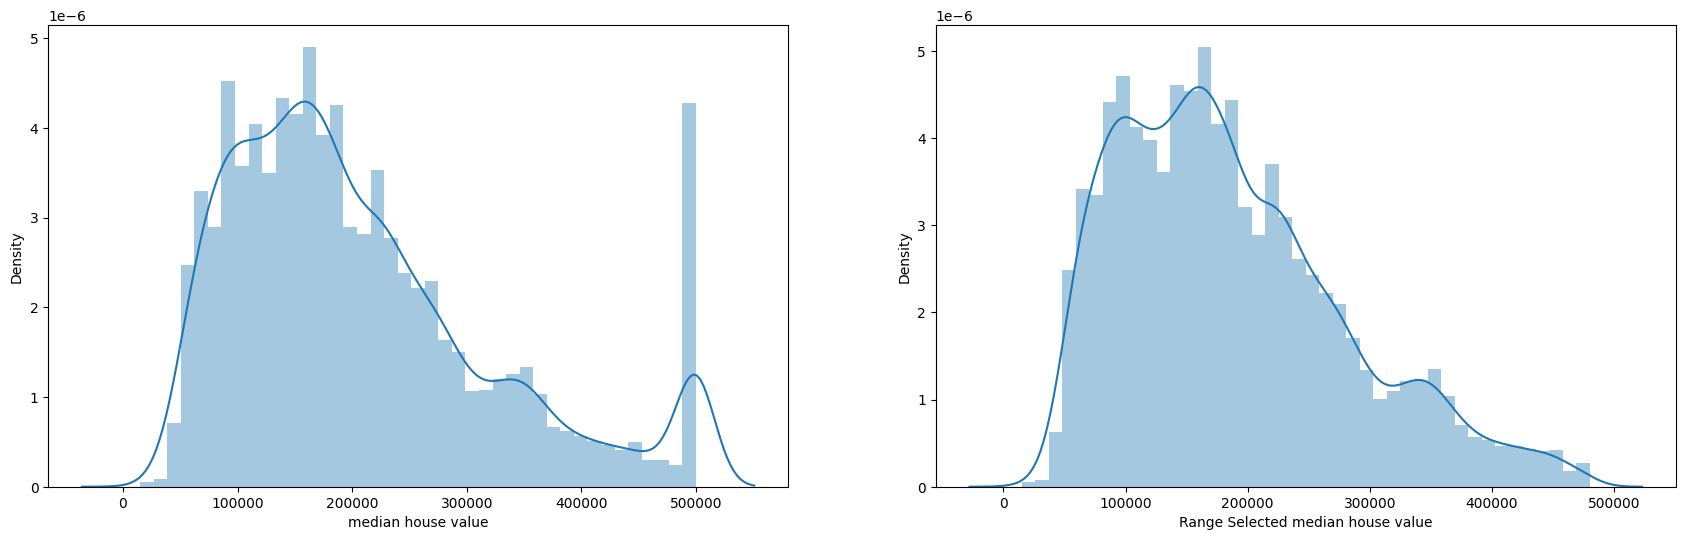

In [524]:
# Melakukan filtering pada data
df_model = df_model[(df_model['median_house_value'] <= 480275.00000)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.distplot(df_model['median_house_value'], ax=axes[1])
axes[0].set_xlabel('median house value')
axes[1].set_xlabel('Range Selected median house value');

In [525]:
# Cek deskriptif statistik kolom 'median_house_value' setelah filtering
df_model['median_house_value'].describe()

count     12256.000000
mean     186869.263789
std       93608.313795
min       14999.000000
25%      113300.000000
50%      170400.000000
75%      241200.000000
max      480100.000000
Name: median_house_value, dtype: float64

**Feature Selection - Drop fitur yang tidak butuhkan untuk pemodelan**

In [526]:
# Drop fitur 'longitude' dan 'latitude'
# df_model = df_model.drop(columns=['longitude', 'latitude'], axis=1)
# setelah di drop ternyata hasil modelnya tidak sebagus ketika fitur tidak drop, maka dari itu tidak jadi di drop

# Drop fitur dengan korelasi terendah
# df_model = df_model.drop(columns=['longitude', 'total_bedrooms','population'], axis=1)
# setelah di drop ternyata hasil modelnya tidak sebaguas ketika fitur tidak drop, maka dari itu tidak jadi di drop

**Clean Dataset**

In [527]:
# Cek dataset yang sudah bersih
df_model.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,income_rate,proximity_encode
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,Low,5
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,Low,4
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,Middle,3
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,Low,3
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,Low,5


In [528]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12256 entries, 0 to 14447
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           12256 non-null  float64 
 1   latitude            12256 non-null  float64 
 2   housing_median_age  12256 non-null  float64 
 3   total_rooms         12256 non-null  float64 
 4   total_bedrooms      12256 non-null  float64 
 5   population          12256 non-null  float64 
 6   households          12256 non-null  float64 
 7   median_income       12256 non-null  float64 
 8   ocean_proximity     12256 non-null  object  
 9   median_house_value  12256 non-null  float64 
 10  income_rate         12256 non-null  category
 11  proximity_encode    12256 non-null  int64   
dtypes: category(1), float64(9), int64(1), object(1)
memory usage: 1.1+ MB


Setelah dilakukan cleaning, data yang tersisa tinggal 12256 baris data dan akan digunakan untuk pemodelan.

### **Modeling**

In [529]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Data Splitting**

In [530]:
# Memisahkan data independen variabel dengan target
# Income_rate dan ocean_proximity tidak diperlukan untuk modeling karena sudah diwakili oleh kolom lain
X = df_model.drop(['median_house_value','income_rate','ocean_proximity'], axis=1)
y = df_model['median_house_value']

**Train and Test Splitting**

In [531]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

**Choose a Benchmark Model**

In [532]:
# algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

In [533]:
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

In [534]:
# Scaling data
scaler = StandardScaler()

In [535]:
# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-59651.12458769 -56594.22032785 -59298.4559595  -58609.56015256
 -59521.23901   ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-42192.7931609  -41037.49130849 -41434.62149157 -41570.41254953
 -41905.93831871] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.23984117 -0.24238923 -0.23662833 -0.25166357 -0.25601813] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-55503.85839253 -53989.06737838 -56950.66823416 -56559.94797019
 -57578.16618352] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-38496.07923113 -37507.60207519 -38636.22863479 -39430.8162971
 -38961.19991693] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
 

In [536]:
# Evaluasi hasil dari 5 algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-58734.920008,1129.035995,-41628.251366,396.396969,-0.245308,0.007333
1,KNN Regressor,-56116.341632,1259.384767,-38606.385231,636.547329,-0.219063,0.006918
2,DecisionTree Regressor,-64982.514904,1191.946703,-44239.294067,639.337004,-0.260409,0.003657
3,RandomForest Regressor,-46887.765721,1662.977285,-31084.588757,469.075165,-0.177334,0.004979
4,XGBoost Regressor,-45564.652904,1565.663052,-30347.897017,654.347254,-0.173547,0.004623


- XGBoost Regressor memiliki Mean RMSE terendah sebesar -45,564.65, menunjukkan error kuadrat rata-rata yang lebih kecil dibandingkan model lain.
- XGBoost Regressor juga memiliki Mean MAE terendah (-30,347.89) dan Mean MAPE terendah (-0.1735). Hal ini mengindikasikan bahwa XGBoost menghasilkan error rata-rata yang lebih kecil dan proporsi error yang lebih rendah terhadap nilai aktual.
- RandomForest Regressor menjadi alternatif yang sangat baik karena performanya mendekati XGBoost Regressor dan memiliki stabilitas tinggi.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost Regressor dan RandomForest Regressor

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost Regressor dan RandomForest Regressor

In [537]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,43633.019756,29749.192855,0.179407
RandomForest,45753.750408,31114.173590,0.188579


Bisa dilihat pada hasil prediksi pada test set diatas, secara kesuluruhan performa XGBoost Regressor lebih baik dibandingkan RandomForest Regressor karena nilai RMSE, MAE dan juga MAPE milik XGBoost Regressor lebih rendah dibandingkan RandomForest Regressor.

**Hyperparameter Tuning**

XGBoost Regressor memiliki performa yang lebih baik secara keseluruhan karena nilai RMSE, MAE, dan MAPE semuanya lebih rendah dibandingkan RandomForest Regressor. Oleh karena itu, XGBoost Regressor akan digunakan sebagai model akhir. Kemudian pada tahap ini akan dilakukan Hyperparameter Tuning yang diharapkan bisa meningkatkan performa model XGBoost Regressor.

- Untuk panduan Grid Search dan Randomized Search, dapat merujuk ke [RandomizedSearchCV](https://scikit-learn.org/stable/modules/grid_search.html)
- Untuk penjelasan tentang hyperparameter yang dapat dituning pada XGBoost, dapat merujuk ke [XGBoost](https://xgboost.readthedocs.io/en/stable/parameter.html).

In [538]:
# Menentukan kedalaman maksimum setiap pohon dalam model
max_depth = list(np.arange(1, 11))
# Menentukan kecepatan pembelajaran (step size) dalam proses boosting
learning_rate = list(np.arange(1, 100)/100)
# Jumlah pohon yang akan dibuat
n_estimators = list(np.arange(100, 201))
# Proporsi sampel data yang digunakan untuk membangun setiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)
# Ambang batas minimal impurity reduction untuk memutuskan apakah suatu node akan di-split
gamma = list(np.arange(1, 11))
# Proporsi fitur yang dipilih secara acak untuk membangun setiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)
# Parameter regularisasi L1 untuk membuat model lebih sederhana dengan menghukum fitur yang kurang penting
reg_alpha = list(np.logspace(-3, 1, 10))

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [539]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

In [540]:
# Pipeline
estimator_xgb = Pipeline([
        ('scaler', scaler),
        ('model', xgb)
        ])

# Cross-validation
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

In [541]:
# Hyperparameter tuning dengan RandomizedSearchCV
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [542]:
# Fitting data training
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=...
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [543]:
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,param_model__colsample_bytree,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,1.110388,0.075552,0.016613,0.001531,0.9,0.059948,119,8,0.05,5,0.8,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-44537.218269,-42521.931238,-45171.545816,-43362.487992,-46158.630159,-44350.362695,1288.265964,1,-30194.065127,-29760.305457,-30214.540579,-29936.337788,-30763.891329,-30173.828056,339.895361,1,-0.175860,-0.179710,-0.181560,-0.185534,-0.190796,-0.182692,0.005111,1
20,0.249378,0.012973,0.012075,0.003676,0.9,0.007743,143,4,0.38,6,0.8,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-46714.878907,-45002.098743,-48670.603702,-45444.240999,-46358.703328,-46438.105136,1274.114477,2,-32300.909776,-31430.180781,-32949.729847,-31988.648053,-31575.073788,-32048.908449,545.152894,2,-0.193721,-0.191743,-0.200197,-0.201305,-0.200877,-0.197569,0.004014,3
17,0.465703,0.012939,0.015328,0.002150,0.6,0.001000,190,5,0.04,9,0.9,"{'model__subsample': 0.6, 'model__reg_alpha': ...",-46330.334145,-44858.412983,-47130.997315,-45976.195449,-48271.251354,-46513.438249,1143.026831,3,-32207.897343,-31818.816784,-32050.694992,-32299.752704,-32690.335092,-32213.499383,288.833148,3,-0.189113,-0.193591,-0.191532,-0.202531,-0.204014,-0.196156,0.005999,2
8,0.545596,0.065299,0.015412,0.000814,0.7,0.021544,182,6,0.31,2,0.6,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-47472.762436,-45335.652900,-48611.883668,-45784.653951,-47800.241454,-47001.038882,1241.706210,4,-33389.484702,-32185.033892,-33104.949168,-32066.561772,-32600.825263,-32669.370959,512.045311,4,-0.197160,-0.196557,-0.198600,-0.201715,-0.207070,-0.200220,0.003862,4
23,0.194225,0.011921,0.010010,0.001210,0.9,3.593814,153,4,0.33,9,0.3,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-47440.499921,-46091.748790,-48974.567561,-47117.193760,-49278.505684,-47780.503143,1189.728897,5,-33540.089269,-33274.152799,-33866.264756,-33855.159131,-34204.407265,-33748.014644,316.712887,7,-0.198388,-0.203887,-0.205137,-0.218763,-0.215354,-0.208306,0.007575,6


In [544]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -44350.36269508337
Best_params: {'model__subsample': np.float64(0.9), 'model__reg_alpha': np.float64(0.05994842503189409), 'model__n_estimators': np.int64(119), 'model__max_depth': np.int64(8), 'model__learning_rate': np.float64(0.05), 'model__gamma': np.int64(5), 'model__colsample_bytree': np.float64(0.8)}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost Regressor dan hyperparameter yang terpilih.

In [545]:
# model XGBoost Regressor
model = {'XGB': XGBRegressor(random_state=1)}
# Menggunakan Estimator Terbaik dari Tuning
xgb_tuning = random_xgb.best_estimator_

In [546]:
# Melakukan fitting model
xgb_tuning.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=np.float64(0.8), device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=np.int64(5),
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None,
                              learning_rate=np.float64(0.05), max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=np.int64(8),
                              max_leaves=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=np.int64(119),
                              n_jobs=None, num_parallel_tree=None,
                              random_state=1, ...))])

In [547]:
# memprediksi target pada data test
y_pred_xgb_tuning = xgb_tuning.predict(X_test)
# Menghitung Metrics Evaluasi
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
# Menyimpan Hasil Evaluasi ke DataFrame
score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,43082.292846,29491.042176,0.178561


**Performance Comparison**

Perbandingan performa model XGBoost Regressor sebelum dan sesudah dilakukan hyperparameter tuning.

In [548]:
score_comparison = pd.DataFrame({
    'RMSE': [score_before_tuning.loc['XGB', 'RMSE'], rmse_xgb_tuning],
    'MAE': [score_before_tuning.loc['XGB', 'MAE'], mae_xgb_tuning],
    'MAPE': [score_before_tuning.loc['XGB', 'MAPE'], mape_xgb_tuning]
}, index=['Before Tuning', 'After Tuning'])
score_comparison

,RMSE,MAE,MAPE
Before Tuning,43633.019756,29749.192855,0.179407
After Tuning,43082.292846,29491.042176,0.178561


Bisa dilihat pada perbandingan diatas, meskipun tidak banyak, namun nilai RMSE, MAE, dan MAPE menjadi lebih baik setelah dilakukan hyperparameter tuning.

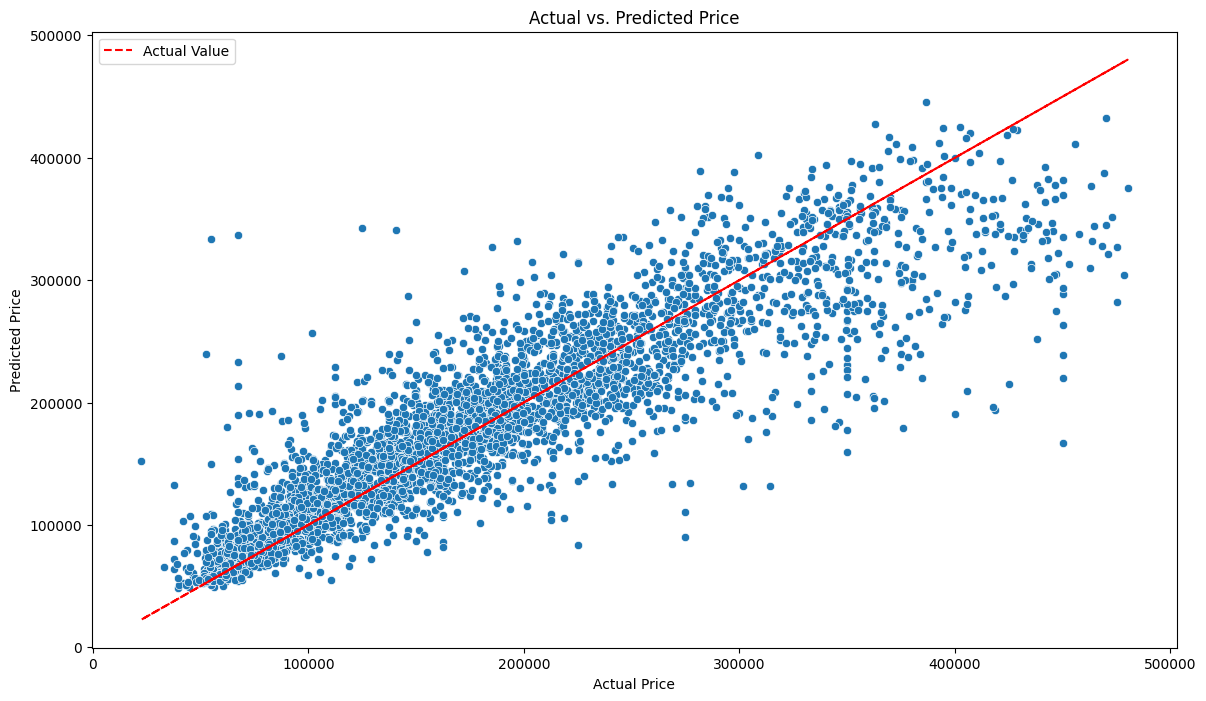

In [549]:
# Scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning)
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual Value')

# Menambahkan label, judul, dan legenda
plt.title('Actual vs. Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

Pada plot di atas, terlihat bahwa sebagian besar prediksi model mendekati harga aktual, yang mencerminkan kinerja model yang cukup baik. Namun, masih terdapat beberapa outlier di mana prediksi model cenderung terlalu tinggi (overestimation) atau terlalu rendah (underestimation) dibandingkan dengan harga aktual. Adanya nilai-nilai error yang besar ini berkontribusi pada perbedaan antara metrik RMSE dan MAE, sebagaimana diuraikan oleh Chai & Draxler (2014), di mana RMSE lebih sensitif terhadap outlier dibandingkan MAE.

Meskipun demikian, nilai MAPE sebesar 17.86% berada dalam rentang 'Good Forecasting', menurut Lewis (1982). Ini menunjukkan bahwa model memiliki kemampuan prediksi yang baik, dengan rata-rata kesalahan prediksi sebesar 17.86% dari nilai aktual. Dengan kata lain, model ini memiliki akurasi yang cukup untuk digunakan dalam memprediksi harga, meskipun ada beberapa sampel yang sulit diprediksi secara akurat.

*Sources:*
- *Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting.*
- *Chai, T., & Draxler, R. R. (2014). Root mean square error (RMSE) or mean absolute error (MAE)? – Arguments against avoiding RMSE in the literature. Geoscientific Model Development, 7(3), 1247–1250.*

**Feature Importances**

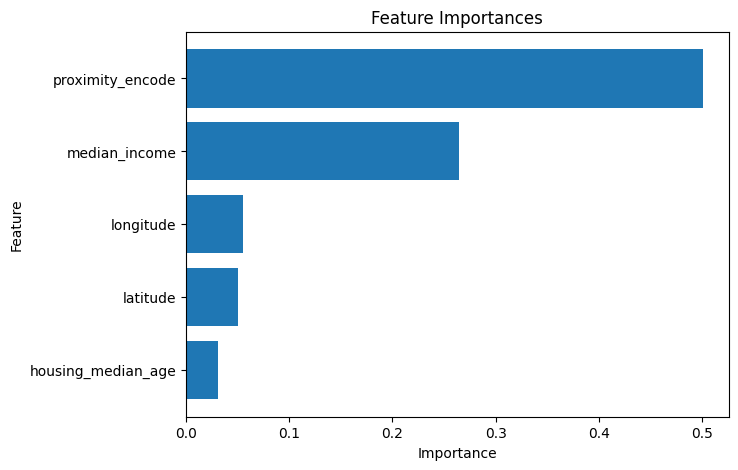

In [550]:
# Mengambil feature importances
importances = xgb_tuning.named_steps['model'].feature_importances_

# Menampilkan feature importances dengan nama fitur
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head()

# Visualisasi feature importances
plt.figure(figsize=(7, 5))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Membalik urutan agar fitur dengan nilai penting lebih tinggi berada di atas
plt.show()

dari barplot diatas bisa kita lihat fitur-fitur apa saja yang mempengaruhi Median House Value.

### **Conclusion**

Berdasarkan analisis data yang dilakukan diawal, fitur 'proximity_encode' dan 'median_income' adalah fitur yang paling berpengaruh terhadap 'median_house_value', hal ini juga didukung kuat oleh pemodelan yang telah dilakukan menggunakan model XGBoost Regressor.

Pada model ini digunakan 3 metrics evaluation, yaitu RMSE, MAE, dan MAPE. Nilai MAPE yang dimiliki oleh model setelah dilakukan hyperparameter tuning adalah 17.86%. Nilai MAPE sebesar 17.86% menunjukkan bahwa model ini berada dalam kategori Good Forecasting, yang berarti rata-rata prediksi model meleset sekitar 17.86% dari nilai actual.

Dengan nilai ini, model dapat digunakan untuk memperkirakan nilai median house value pada rentang data yang mirip dengan data training. Meskipun demikian, hasil evaluasi juga menunjukkan bahwa terdapat beberapa outlier yang menyebabkan prediksi jauh meleset dari nilai aktual, baik dalam bentuk overestimation maupun underestimation. Hal ini dapat disebabkan oleh keterbatasan fitur dalam dataset yang digunakan. Fitur tambahan yang lebih relevan, seperti faktor eksternal atau atribut yang lebih spesifik, berpotensi meningkatkan akurasi prediksi model di masa depan.

Untuk mengetahui tingkat efektivitas penggunaan model, karena dataset yang kita gunakan adalah data dari tahun 1990 maka **Backtesting** adalah metode yang paling relevan untuk mengukur efektivitas model dalam memprediksi data historis.

### **Recommendations**

    Lakukan Backtesting untuk menguji tingkat efektivitas model terhadap harga median house value.

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:
1. Tentukan prediksi yang memiliki nilai error tinggi (overestimation dan underestimation). Pemisahan error akan membantu mengidentifikasi area yang perlu diperbaiki. Setelah mengelompokkan data berdasarkan error, periksa hubungan antara error dan fitur-fitur yang ada (seperti median income, proximity encode, longitude, dan latitude). Temukan fitur mana yang paling berkontribusi terhadap error tinggi dan perbaiki dengan feature engineering atau transformasi fitur.

2. Gunakan ensemble methods seperti bagging atau boosting untuk mengurangi overfitting dan meningkatkan stabilitas model.

3. Gunakan pembagian data yang lebih tepat dengan cross-validation atau hold-out validation untuk mengevaluasi model dengan data yang tidak terlihat. Jika memungkinkan, gunakan data terbaru untuk melakukan validasi model dan menghindari overfitting pada data historis.

4. Pertimbangkan untuk menggabungkan beberapa fitur yang ada untuk menciptakan fitur baru yang lebih informatif.

5. Kita juga bisa mengembangkan model untuk memprediksi Harga rumah dinamis, yang mempertimbangkan faktor ekonomi dan sosial masyarakat. Untuk melakukan itu kita bisa saja melibatkan variabel lain misalkan seperti tingkat pengangguran, pertumbuhan ekonomi, dll.

#### **Save Model**

In [552]:
# Save model
import pickle

estimator = Pipeline([('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_Median_House_Value_XGB.sav', 'wb'))

In [554]:
# Load model
filename = 'Model_Median_House_Value_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [555]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

np.float64(43633.01975609102)